In [1]:
import torch
import os

from training.train import train
from utils.config import Config, DatasetLoader
from utils.model import evaluate, load_models

### Preliminaries

Setting up hyperparameter config, loading datasets

The next directories will be created in a provided root directory:
- `weights` - .pt files for the last epoch when saving
- `results` - images generated by GANs for test samples every 10 epochs
- `scores` - .csv files containing values of metrics over epochs

In [2]:
config = Config(batch_size=32, root=os.getcwd())
dataset_loader = DatasetLoader.FACADE
train_dl, test_dl = dataset_loader.load(config)

### Model 

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator, discriminator = load_models(dir=os.path.join(config.root, 'weights'), device=device, config=config)

### Training

Training on cuda (NVIDIA GeForce RTX 3090)

Weights restored from a model trained on 150 epochs

Epoch 10/10


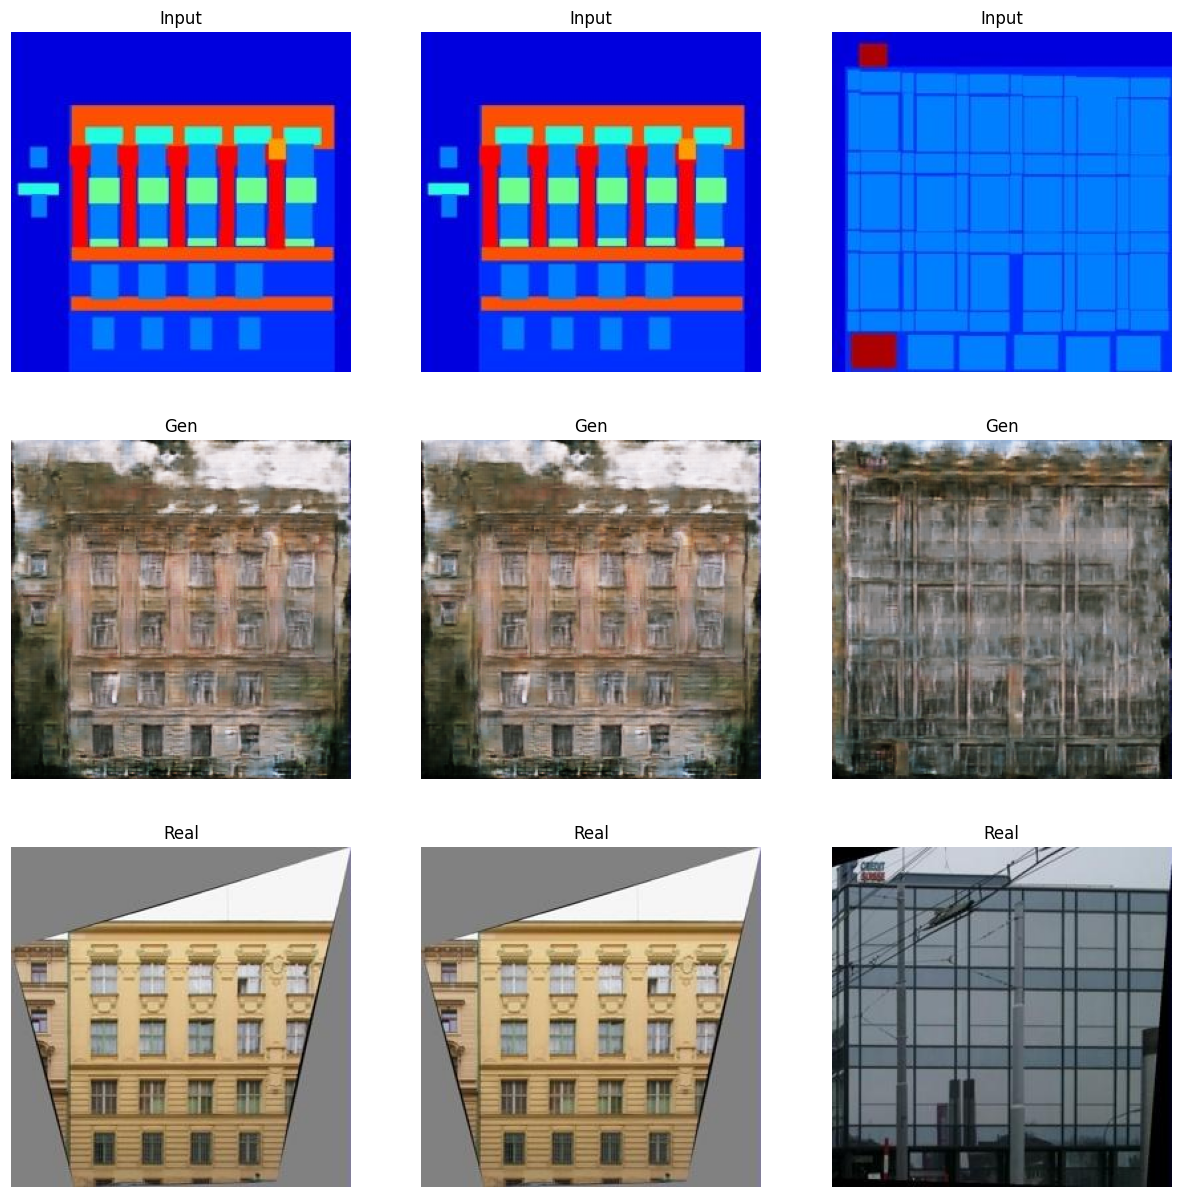

In [4]:
train(generator, discriminator, epochs=10, train_dl=train_dl, test_dl=test_dl, device=device, config=config, epochs_to_save=10, name='base_training')

### Evaluation

In [5]:
test_report = evaluate(generator=generator, test_dl=test_dl, device=device)

In [6]:
print(test_report)

FID score: 152.25

